# Trabajo Práctico 5 - Grupo 2
## Matías Bergerman, Pablo González Leiro, Tobias Demeco, Matías Tripoli

In [2]:
# Import libraries
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

## Ejercicio 1
### Inverse Filtering

## Ejercicio 2
### Wiener

## Ejercicio 3
### Blind deconvolution

## Ejercicio 4
### Motion blur

## Ejercicio 5
### Regularizacion y metodos iterativos

## Ejercicio 6
### Eliminación de interferencia

In [247]:
from PIL import Image
from scipy.fft import fft2, fftshift, ifftshift, ifft2
from matplotlib import pyplot as plt
import numpy as np

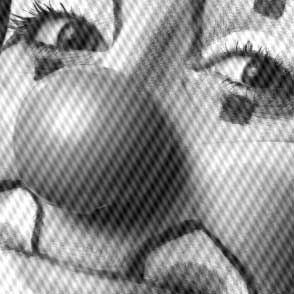

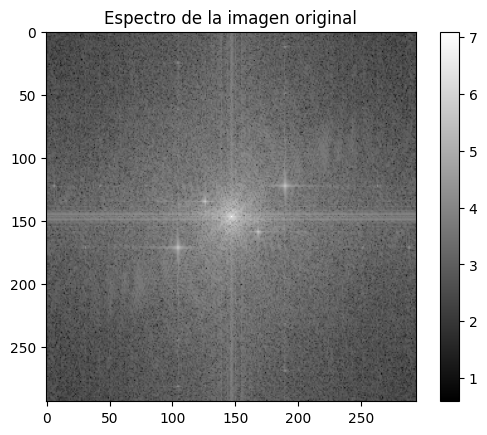

In [249]:
clown = Image.open("images/clown.jpg")
clown_arr = np.asarray(clown)[:,:,0]
clown_freq = fftshift(fft2(clown_arr))

display(clown)
# Plot spectrum
clown_freq_log = np.log10(np.abs(clown_freq)+1)
plt.imshow(clown_freq_log, cmap="gray", vmin=np.min(clown_freq_log), vmax=np.max(clown_freq_log))
plt.title("Espectro de la imagen original")
plt.colorbar()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2288\3558466352.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  H[u, v] = ( 1 / (1 + (D0k/Dkplus)**n ) ) * ( 1 / (1 + (D0k/Dkminus)**n ) )


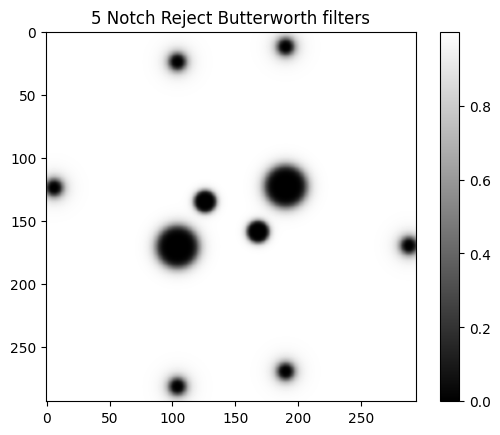

In [256]:
# Butterworth Notch filter
import numpy as np
from matplotlib import pyplot as plt

def Dk(u:int, v:int, M:int, N:int, uk:int, vk:int) -> float:
    return np.sqrt( (u-M//2-uk)**2  + (v-N//2-vk)**2 )

def notchR2d(D0k, n, M, N, uk, vk):
    H = np.zeros((M,N))
    for u in range(M):
        for v in range(N):
            Dkplus = Dk(u, v, M, N, uk, vk)
            Dkminus = Dk(u, v, M, N, -uk, -vk)
            H[u, v] = ( 1 / (1 + (D0k/Dkplus)**n ) ) * ( 1 / (1 + (D0k/Dkminus)**n ) )
    return H

M = N = 294
Hnotch1 = notchR2d(D0k=17, n=8, M=M, N=N, uk=24, vk=-43)
Hnotch2 = notchR2d(D0k=13, n=8, M=M, N=N, uk=12, vk=21)
Hnotch3 = notchR2d(D0k=7, n=4, M=M, N=N, uk=123, vk=43)
Hnotch4 = notchR2d(D0k=7, n=4, M=M, N=N, uk=23, vk=141)
Hnotch5 = notchR2d(D0k=7, n=4, M=M, N=N, uk=135, vk=-43)
Hnotch = Hnotch1 * Hnotch2 * Hnotch3 * Hnotch4 * Hnotch5

plt.imshow(Hnotch, cmap="gray")
plt.title("5 Notch Reject Butterworth filters")
plt.colorbar()
plt.show()

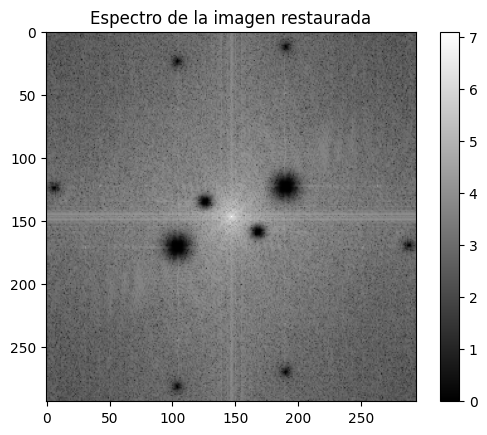

In [257]:
clown_freq_filtered = np.multiply(clown_freq, Hnotch)

# Plot spectrum of filtered image
clown_freq_filtered_log = np.log10(np.abs(clown_freq_filtered) + 1)
plt.imshow(clown_freq_filtered_log, cmap="gray")
plt.title("Espectro de la imagen restaurada")
plt.colorbar()


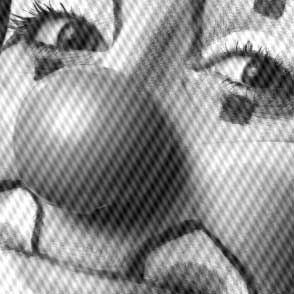

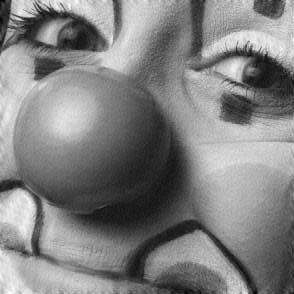

In [258]:
clown_filtered = np.real(ifft2(ifftshift(clown_freq_filtered)))
plt.imsave("images/clown_filtered.jpg", clown_filtered, format="jpg", cmap="gray")

# Plot original image vs. filtered image
display(clown, Image.open("images/clown_filtered.jpg"))


In [ ]:
# # Butterworth Band Reject filter
# import numpy as np
# from matplotlib import pyplot as plt

# def D(u:int, v:int, M:int, N:int) -> float:
#     return np.sqrt( (u-M//2)**2  + (v-N//2)**2 )

# def butterBR2d(C0, W, n, M, N):
#     H = np.zeros((M,N))
#     for u in range(M):
#         for v in range(N):
#             Duv = D(u, v, M, N)
#             H[u, v] = 1 / (1 + ( (Duv*W) / (Duv**2 - C0**2) )**(2*n) )
#     return H

# M = N = 294
# H2 = butterBR2d(C0=64, W=16, n=2, M=M, N=N)

# plt.imshow(H2, cmap="gray")
# plt.title("Band Reject 2D Butterworth filter of 2th order")
# plt.colorbar()
# plt.show()

# plt.plot(H2[:,N//2])
# plt.title("Band Reject Butterworth filter")
# plt.legend(["n=2"])
# #plt.hlines(y=[gammaL, gammaH], xmin=0, xmax=M, colors="k" ,linestyles="dotted")
# plt.show()
